# Frequencies & Distribution of Wildfires in California

**Ashley Seung - Environmental Systems (Earth Science); SIO 113**

**Introduction**

We have seen fires happening more than we would like and that goes to show how climate change is impacting the natural disasters that we have in the state of California. One of those natural disasters being wildfires which threaten the forests and urban vegetation. Unfortunately, large-scale fires have affected mass populations and wreaking havoc on our environment. Climate change and anthropogenic factors play a major role in ushering in heat waves, droughts, dust storms, and wildfires. They bring extreme consequences in California's ecosystems and damage infrastructure along with injuring and killing people. Thus, fire detection and accurate hazard maps have been created to adopt rapid response plans and early warning systems to prevent these negative impacts. The purpose of early planning and emergency plans is to minimize their impcats on civilization, ecosystems, and the environment. Through the use of Python, we can use datasets on past fires in California to make graphs and plots to detect patterns and fire-prone areas. As a native-born citizen of California, I wanted to raise awareness on wildfires and the damages they cause.

**Site for my Datasets**

1. https://www.kaggle.com/rtatman/188-million-us-wildfires


2. https://www.kaggle.com/capcloudcoder/us-wildfire-data-plus-other-attributes?select=FW_Veg_Rem_Combined.csv

**FOR PROFESSOR MAY & BRENDAN**: I put my code comments in markdown cells rather than in the code cell because I think it looks cleaner and nicer. I hope you do not mind this. You can see before every cell, there is an explanation on what each function and code does along with how I achieved it. I have the functions and instructions within `highlighted text`. 

**Importing in Necessary Codes**

- We need to `import` the necessary packages to run our code for this project.

In [7]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from matplotlib import cm
%matplotlib inline
from IPython.display import Image

import cartopy
import cartopy.crs as ccrs
from cartopy import config
from cartopy.mpl.ticker import LongitudeFormatter, LatitudeFormatter
from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER
from cartopy import feature as cfeature
from cartopy.feature import NaturalEarthFeature, LAND, COASTLINE, OCEAN, LAKES, BORDERS
import matplotlib.ticker as mticker

import geopandas as gpd
import geoplot as gplt

from jdcal import jd2gcal
import seaborn as sns
import sqlite3

**Reading in sqlite3 Dataset on Wildfires in the United States**

- For sqlite3 datasets, you have to make a connection to the sqlite3 dataset by using `sqlite3.connect()`. It returns a connection object that we will use to interact with the SQLite database held in the file we need.
- We also need to choose the files we are going to keep for our dataset, or the ones relevant to our project. I made it into a docstring rather than an individual list of column names. At the end of the cell, the `pd.read_sql_query`, allows us to read in the dataset as a `Pandas DataFrame`. It takes the SQL Query and connection object in the parameter.

In [10]:
wildfire = 'FPA_FOD_20170508.sqlite' #reading in sqlite3 dataset
connect = sqlite3.connect(wildfire) #connecting sqlite3 dataset to a variable name
keeps = '''
    SELECT
        NWCG_REPORTING_AGENCY, NWCG_REPORTING_UNIT_ID,
        NWCG_REPORTING_UNIT_NAME,
        FIRE_NAME,
        COMPLEX_NAME,
        FIRE_YEAR,
        DISCOVERY_DATE,
        DISCOVERY_DOY,
        DISCOVERY_TIME,
        STAT_CAUSE_CODE,
        STAT_CAUSE_DESCR,
        CONT_DATE,
        CONT_DOY,
        CONT_TIME,
        FIRE_SIZE,
        FIRE_SIZE_CLASS,
        LATITUDE,
        LONGITUDE,
        OWNER_CODE,
        OWNER_DESCR,
        STATE,
        COUNTY
    FROM
        Fires;
'''
fire1 = pd.read_sql_query(keeps, connect) #setting sqlite3 dataset into a Pandas DataFrame format

**Filtering Dataset to Keep Only California** 

- We first need to filter out the states we do not need. We only need to keep California since that is the targeted state. This is optional, but I chose to drop the unnecessary columns that will not be used in this project.
- To drop unnecessary columns, first make a `list` of the columns that are going to be dropped and then use `df.drop()` to drop them from the dataset you are using.

In [11]:
#list of columns we are going to keep
col_drop = ['NWCG_REPORTING_AGENCY', 'NWCG_REPORTING_UNIT_ID', 'NWCG_REPORTING_UNIT_NAME', 'COMPLEX_NAME', 'OWNER_CODE', 'OWNER_DESCR', 'COUNTY']
firesCA = fire1[fire1.STATE == 'CA'].drop(columns = col_drop) #dropping other states and keeping California
lons = firesCA.LONGITUDE #setting a variable name to a column, longitude
lats = firesCA.LATITUDE #setting a variable name to a column, latitude

**Distribution of Fire Size Classes in California**

- The image below shows the different fire size classes, A - G. The dataset I am using utilizes the USDA Forest Service Wildfire Classes. It shows us the fire size of each class. A being the smallest in acres and G being anything greater than five thousand acres. 

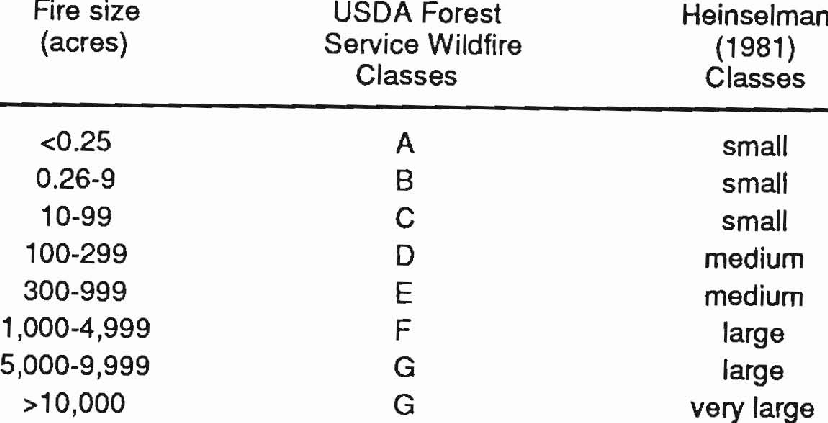

In [16]:
Image(filename = 'fire_size_class.png', width = 400)

- This histogram shows the relationship between the frequency of each fire size class (A - G). We can see that there are a lot of class A fires meaning that most of the fires in California are small and frequent. The classes reduce in frequency as Class G fires are rare, but existent. The graph gives us a close representation of an exponential decay curve.
- It makes it easier to understand if you sort your dataset values by using `df.sort_values()`. `plt.hist()` was used to determine the frequency of each fire size class in the state of California. Remember to `label your x and y values` along with `abeling your precious graph`. 
- In regards to the bins, I struggled to make them equal with the default `plt.hist()` arguments, so I manually set my `bins` to 7 intervals and added `plt.xticks` to support that so that the histogram has 7 equally sized bars and tick marks. 

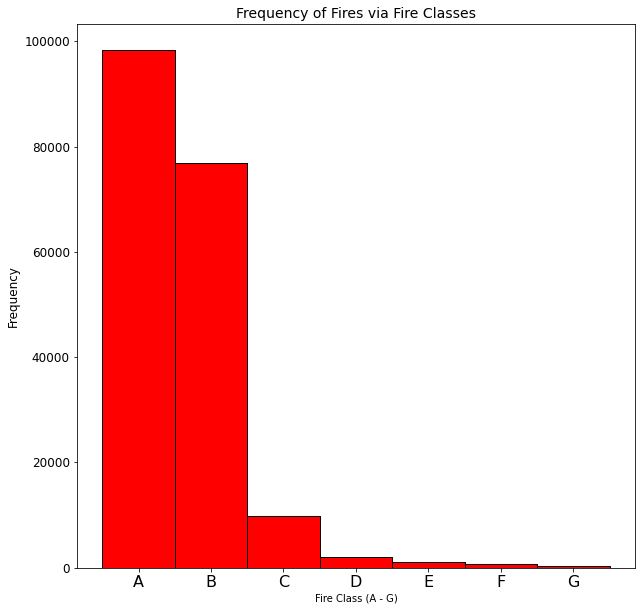

In [12]:
firesCA.sort_values(by = ['FIRE_SIZE_CLASS'], ascending = True, inplace = True); #sorting dataset by ascending fire class sizes (A to G)
fig = plt.figure(figsize = [10, 10]) #set size of the figure
bins = np.arange(8) - 0.5; #setting our bins values to be 7 evenly spaced ticks
plt.hist(firesCA.FIRE_SIZE_CLASS, bins, rwidth = 1, color = 'red', edgecolor = 'black') #plotting our histogram
plt.xlabel('Fire Class (A - G)', fontsize = 10) #label x axis
plt.ylabel('Frequency', fontsize = 12) #label y axis
plt.title('Frequency of Fires via Fire Classes', fontsize = 14) #label figure
plt.xticks(range(7), fontsize = 16); #setting our xticks to be 7 even spaces and fontsize to easily see each class
plt.yticks(fontsize = 12) #set fontsize of y axis
plt.savefig('Frequency of Fires via Fire Classes.png', format = 'png', dpi = 200) #saving the figure

- In the figure below, we are given a point plot in the distribution of the wildfires in California and their fire class size.
- I made a point plot that shows us the fire class size of each fire location utilizing the longitudes and latitudes of each wilfire in California. 
- As expected, the coastline and the middle (vertical) strip of California, have many E through G class fires. This part of California has the most vegetation due to the proximity to the coastline and access to water. This means that there are lot of vegetation in that area that are easily flammable. 
- Import the `lambert_projections.py` module so you can run the Lambert Conformal Projections and make your maps. Having the `gdf` allows us to make our geoplots. It is important to have your `geometry` set to your designated arrays of `longitudes` and `latitudes`. Set your `ax.extent()` to whichever coordinate bounds you want. I focused mine on California using `[-130.0, -70.0, 15.0, 52.0]`. You can add in the state provinces to make distinct lines between each state, but this is optional. To get my point plot, I used the `gplt.pointplot()` to get my plot. Set your `colormap (cmap)` to a colorset that makes it easy for readers to see each individual class.


- **NOTE FOR PROFESSOR MAY & BRENDAN**: This geoplot takes 5 to 20 minutes to run. I have no idea why it takes such a long time, and trust me, it drove me insane trying to make those small changes and it would take me days to get what I want because of how long it takes for this geoplot to run. Please don't mark me down for this. These two plots made me miserable for the 2 weeks I've been working on this project. Regarding the colormap, the previous one I used made it difficult to see classes A & B, so hopefully this colormap makes it easier for you to see the individual colors and classes along with their frequency and distribution across California. Using a uniform or sequential colormap made it difficult for each class to be seen so I ended up using individual colors.

In [13]:
import lambert_projections as lambert #importing in our modules w/ 3 functions from Lecture 17

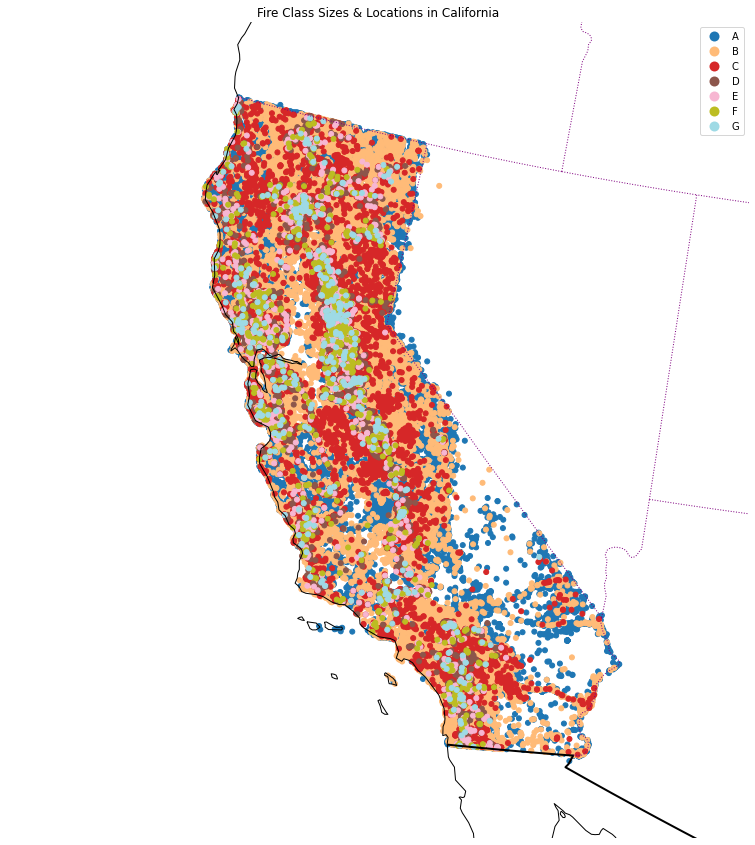

In [14]:
plt.figure(figsize = (15, 15)) #setting size of figure to be big enough to see all the dots

#setting our geopandas using our filtered data and geometry
gdf = gpd.GeoDataFrame(firesCA, geometry = gpd.points_from_xy(lons, lats))

proj = ccrs.LambertConformal(central_longitude = 260.0, central_latitude = 33.0)
ax = plt.axes(projection = proj)
ax.set_extent([-130.0, -70.0, 15.0, 52.0], crs = ccrs.PlateCarree())
ax.add_feature(BORDERS, linestyle = '-', linewidth = 2)
states_provinces = cfeature.NaturalEarthFeature(
        category = 'cultural',
        name = 'admin_1_states_provinces_lines',
        scale = '50m',
        edgecolor = 'purple',
        facecolor = 'none',
        linestyle = 'dotted')
ax.add_feature(states_provinces); #adding in state lines

ax.coastlines() #adding in coastline of United States

#plotting our point plot of the location and distribution of past fires
gplt.pointplot(gdf, ax = ax, hue = 'FIRE_SIZE_CLASS', cmap = 'tab20', legend = True)
plt.title('Fire Class Sizes & Locations in California') #label point plot
plt.savefig('Fire Class Sizes & Locations in California.png', format = 'png', dpi = 200) #saving figure

- This figure displays the pattern of wildfire densities in California. We can see the clusters of high classes from the graph above and compare to the figure below. Where you see the most rings, are the areas with the most amount of fires.

- I made a `contour plot` using `gplt.kdeplot()` for the locations of wildfires in California. A `heatmap` can provide the density of anything through color variance as long as you are provided with the `longitude` and `latitude` values of whatever project you are working on.


- **NOTE FOR PROFESSOR MAY & BRENDAN**: This geoplot takes 5 to 20 minutes to run (I'd say even longer than the first geoplot, might have to do with the seaborn import, but I don't know how to fix it). I have no idea why it takes such a long time, and trust me, it drove me insane trying to make those small changes and it would take me days to get what I want because of how long it takes for this geoplot to run. Please don't mark me down for this. These two plots made me miserable for the 2 weeks I've been working on this project.

C:\Users\ashle\anaconda3\envs\sio113-2021-py3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\ashle\anaconda3\envs\sio113-2021-py3\lib\site-packages\seaborn\distributions.py:1676: UserWarning: `shade_lowest` is now deprecated in favor of `thresh`. Setting `thresh=0.05`, but please update your code.
  warnings.warn(msg, UserWarning)


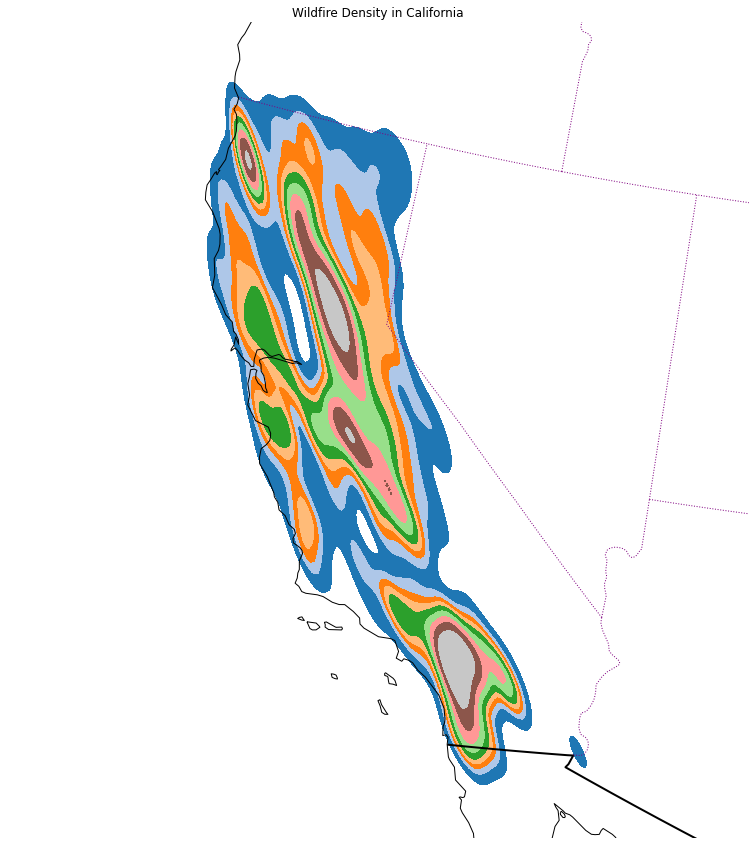

In [15]:
plt.figure(figsize = (15, 15)) #setting size of figure to be big enough to see all the dots

#setting our geopandas using our filtered data and geometry
gdf = gpd.GeoDataFrame(firesCA, geometry = gpd.points_from_xy(lons, lats))

proj = ccrs.LambertConformal(central_longitude = 260.0, central_latitude = 33.0)
ax = plt.axes(projection = proj)
ax.add_feature(BORDERS, linestyle = '-', linewidth = 2)
states_provinces = cfeature.NaturalEarthFeature(
        category = 'cultural',
        name = 'admin_1_states_provinces_lines',
        scale = '50m',
        edgecolor = 'purple',
        facecolor = 'none',
        linestyle = 'dotted')
ax.add_feature(states_provinces); #adding in state lines

ax.coastlines() #adding in coastline of United States

#plotting contour plot of the location and distribution of past fires
gplt.kdeplot(gdf, ax = ax, shade = True, cmap = 'tab20')
plt.title('Wildfire Density in California') #label contour plot
plt.savefig('Wildfire Density in California.png', format = 'png', dpi = 200) #saving figure

**Frequency of Fires & Their Causes Throughout Time**

- In the figure below, we can see the pattern in which the wildfires occur in California.
- To extract the month and day out of each record, we use `.jd2gcal` on the new dataframe we made, `firesCA['MONTH']`. `Lambda` function was used to apply that function to each record as the discovery date is based in Julian date form. To use the `heatmap` function below, you need to group two columns together by using `df.groupby()` so that you are left with one combined column to plot your data. `df.size()` returns an int representing the number of elements in this object. `df.unstack()` returns a DataFrame having a new level of column labels whose inner-most level consists of the pivoted index labels. Combining these two functions to a `df.groupby` function allows for you to combine multiple columns in a sqlite dataset and make it into a single column.
- I used a `seaborn graph` to plot my heatmap because it provided me with a high-level interface graph that looked more attractice and informative. Matplotlib wouldn't give me anything so I stuck with seaborn. In the end, I did `sns.heatmap` to plot my `df.groupby()` data.
- As for the `plt.yticks`, you can make an `array of values` that start from `January to December` and then `label` them by their respective name. I set them to be `horizontal` as having them vertical would make them bump into each other. The `plt.xticks` are not needed necessarily, because the years are provided by the data you used to plot this heatmap. 

In [16]:
#Using .jd2gcal() to convert Julian date to regular date and lambda to apply to each record
firesCA['MONTH'] = firesCA['DISCOVERY_DATE'].apply(lambda x: jd2gcal(x, 0)[1])
#grouping the dataset made above with the discovery year, then using df.size() and df.unstack() to resize the data
fires_freq_months = firesCA.groupby(['MONTH', 'FIRE_YEAR']).size().unstack()

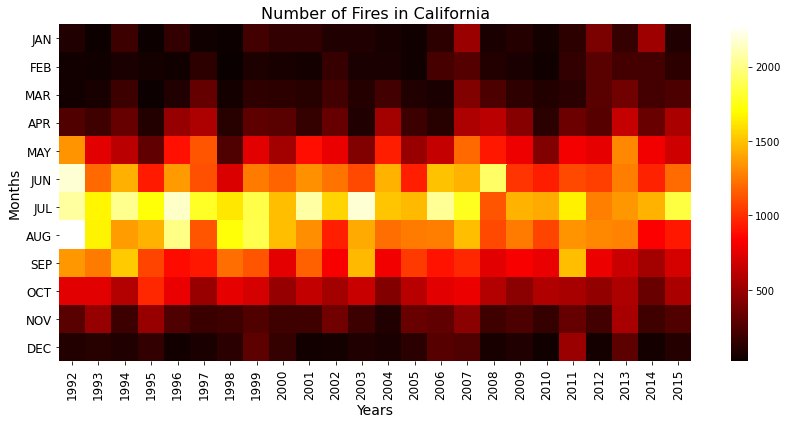

In [17]:
plt.figure(figsize = [12, 6]) #set size of figure
sns.heatmap(fires_freq_months, cmap = 'hot'); #plot heatmap using seaborn
Months = ['JAN', 'FEB', 'MAR', 'APR', 'MAY', 'JUN', 'JUL', 'AUG', 'SEP', 'OCT', 'NOV', 'DEC'] #make list of the months
#set y ticks to be 12 even spaces, label them with the list of months
plt.yticks(np.arange(0.5, 12.5), labels = Months, rotation = 0, fontsize = 12)
plt.xticks(fontsize = 12); #fontsize of xticks to be big enough to be seen
plt.ylabel('Months', fontsize = 14) #set y label
plt.xlabel('Years', fontsize = 14) #set x label
plt.title('Number of Fires in California', fontsize = 16) #set title of graph
plt.tight_layout() #make the graph more condensed, in a nicer format
plt.savefig('Number of Fires in California.png', format = 'png', dpi = 200) #save the figure

- In the figure below, we can see the distribution of wildires, their respective causes, and year in which they happened. 
- The same process as the cell above will apply to the one below. Use `df.groupby()` to combine the cause of fires to the year the fire was found and make them into a single column. Add the `df.size()` and `df.unstack()` functions to it as well. That data will go into your `sns.heatmap()` arguments. The choice of `colormap`, `linewidth`, `vmin`, and `vmax` are up to you. I chose `Reds` because I felt it was appropriate and it showed the clearly disaplyed the change in colors in the figure. The vmin and vmax will determine the range of color variance. This time the `plt.yticks` are left alone. In this case, `plt.xticks` are not needed because the years are already arranged in the data. The `rotation` will again be horizontal.
- Remember that for ranges, you need to go down one unit for the start and go up for the end because we are going by indices, not a simple list of numbers. 

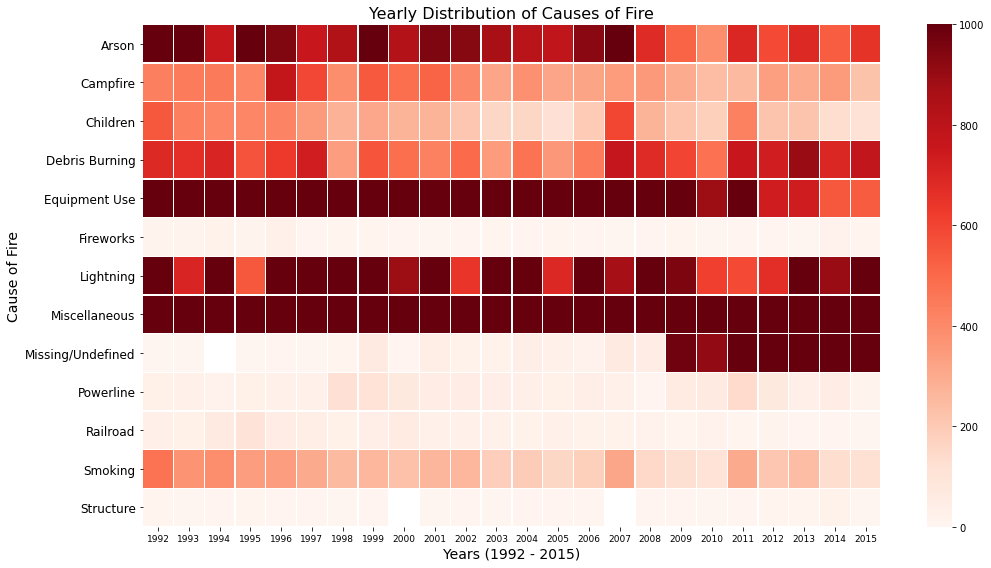

In [18]:
#grouping fire cause with discovery year, then using df.size() and df.unstack() to resize the data
fires_cause = firesCA.groupby(['STAT_CAUSE_DESCR', 'FIRE_YEAR']).size().unstack()
plt.figure(figsize = [15, 8]) #set size of figure, big enough to see everything closely
#plot heatmap using seaborn
ax = sns.heatmap(fires_cause, cmap = 'Reds', linewidth = 0.3, vmin = 0, vmax = 1000); 
plt.yticks(fontsize = 12) #fontsize of yticks to be big enough to read
plt.ylabel('Cause of Fire', fontsize = 14) #label y axis
plt.xlabel('Years (1992 - 2015)', fontsize = 14) #label x axis
plt.xticks(fontsize = 9); #fontsize of xticks to be big enough to read
plt.title('Yearly Distribution of Causes of Fire', fontsize = 16) #set title of graph
plt.tight_layout() #make the graph more condensed, in a nicer format
plt.savefig('Yearly Distribution of Causes of Fire.png', format = 'png', dpi = 200) #save the figure

**Comparing Climate Variables**

- I read in another dataset, `FW_Veg_Rem_Combined.csv`, that is related to the one I used at the beginning. This dataset is based off the other one, but with other attributes. Once again, we only need `California`, so `filter` out the unnecessary states with whatever method suits you best, I used `df.isin()` to isolate California. Make a `list` of the columns you don't need and drop them using `df.drop`. Next, use df.dropna() to drop the rows that have `Nan` values that will cause errors in your code in the future. Filter the data to only take values above 2009, giving us 2010 to 2015. This is optional, but I made the years go in order using `df.sort_values()`.

In [19]:
veggie = pd.read_csv('FW_Veg_Rem_Combined.csv') #reading in dataset as Pandas DataFrame
US_CA = ['CA'] #empty list of California
veggie1 = veggie[veggie['state'].isin(US_CA)] #filtering dataset to only provide California
#list of columns that need to be dropped
drops2 = ['Unnamed: 0', 'Unnamed: 0.1', 'fire_size', 
         'Temp_pre_7', 'Temp_pre_15', 'Wind_pre_7', 'Wind_pre_15', 
         'Hum_pre_7', 'Hum_pre_15', 'Prec_pre_7', 'Prec_pre_15',
         'weather_file', 'fire_size_class', 'stat_cause_descr',
         'disc_clean_date', 'cont_clean_date', 'discovery_month',
         'disc_date_final', 'cont_date_final', 'putout_time',
         'disc_date_pre', 'disc_pre_month',
         'wstation_usaf', 'dstation_m', 'wstation_wban',
         'wstation_byear', 'wstation_eyear', 'fire_mag']
veggie2 = veggie1.drop(drops2, axis = 1) #dropping the list of unneeded columns
veggie2.dropna(inplace = True) #getting rid of NaN values
filterveg = veggie2[veggie2['disc_pre_year'] > 2009] #filtering data to give me data past 2009, 2010-2015
#sorting fire years chronologically, from 2010 to 2015, optional
filterveg.sort_values(by = ['disc_pre_year'], ascending = True, inplace = True);
filterveg.head(10)

<ipython-input-19-b11f0cacb7e6>:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filterveg.sort_values(by = ['disc_pre_year'], ascending = True, inplace = True);


,fire_name,latitude,longitude,state,disc_pre_year,Vegetation,Temp_pre_30,Temp_cont,Wind_pre_30,Wind_cont,Hum_pre_30,Hum_cont,Prec_pre_30,Prec_cont,remoteness
8331,HIGHWAY,33.433500,-116.845030,CA,2010,16,18.940517,0.000000,1.807220,0.000000,71.632450,0.000000,0.3,0.0,0.465985
8473,LATROBE,38.652733,-121.070748,CA,2010,0,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.0,-1.0,0.505940
8456,WESTMOORE,40.514526,-121.955951,CA,2010,15,15.496612,0.000000,2.536883,0.000000,63.065261,0.000000,0.0,0.0,0.514167
12777,3-1 RAIL,41.158833,-121.318033,CA,2010,15,15.816846,22.316438,2.834501,2.239726,46.570461,33.136986,5.6,0.3,0.507342
8322,BUMMER,38.316389,-120.001389,CA,2010,0,11.561224,4.916667,1.766709,0.937500,43.229592,66.541667,53.8,0.0,0.495163
20829,BASELINE,38.751944,-121.393056,CA,2010,0,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.0,-1.0,0.509198
36303,TGU SPRING,40.393100,-122.134700,CA,2010,14,22.874008,0.000000,1.940476,0.000000,46.354167,0.000000,0.0,0.0,0.516059
53813,BULL,35.785278,-118.474722,CA,2010,15,32.458716,31.076577,3.943578,3.665315,0.000000,0.000000,0.0,0.0,0.072385
53816,CANYON,35.556389,-118.601944,CA,2010,15,27.023270,23.422353,2.574128,2.374852,35.522262,41.295858,0.0,0.0,0.074459
8157,WILLOW,36.718889,-119.726944,CA,2010,0,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.0,-1.0,0.493217


- I made `datasets of each year` starting from `2010 and up to 2015`, since that is the highest year this dataset has. You can use many ways to make your datasets, for mine, I used `df.iloc()` as it `filters` my dataset as well. This allows me to pull out whichever column I need without having to go through the trouble of doing a lot of code.
- Then, I took the `mean` of each climate variable with respect to the columns, `30 days prior (Temp_pre_30)` and `up-to-day (Temp_cont)`. First I made a `list` for my datasets and then `empty lists` for my 30 day prior and up-to-day values. Then, I attempted a `for` loop and somehow it worked. Within my for loop, I `appended` each variable to their respective empty list and then took the `mean` of each. I made the `years` (2010-2015) into a list to serve as my x-axis value and so I don't have to make xticks for each graph. 


- **NOTE FOR PROF. DAVE & BRENDAN**: I hope this for loop is tidy enough. I realized that the chunks of code I had before was a bit too much and I knew I had to clean it up with a for loop.

In [22]:
from statistics import mean #importing package used from Lecture 15, df.mean()

#filtering and making datasets of each year from 2010 to 2015 
filterveg2010 = filterveg.loc[filterveg['disc_pre_year'] == 2010]
filterveg2011 = filterveg.loc[filterveg['disc_pre_year'] == 2011]
filterveg2012 = filterveg.loc[filterveg['disc_pre_year'] == 2012]
filterveg2013 = filterveg.loc[filterveg['disc_pre_year'] == 2013]
filterveg2014 = filterveg.loc[filterveg['disc_pre_year'] == 2014]
filterveg2015 = filterveg.loc[filterveg['disc_pre_year'] == 2015]

#list of the newly made datasets
filterveg_list = [filterveg2010, filterveg2011, filterveg2012, filterveg2013, filterveg2014, filterveg2015]
#make empty lists of each variable and the columns I'm going to use
temp30 = []
tempcont = []
wind30 = []
windcont = []
hum30 = []
humcont = []
prec30 = []
preccont = []

#make for loops to shorten code, append each variable to their respective empty list and take the mean of each
for i in filterveg_list:
    temp30.append(i['Temp_pre_30'].mean())
    tempcont.append(i['Temp_cont'].mean())
    wind30.append(i['Wind_pre_30'].mean())
    windcont.append(i['Wind_cont'].mean())
    hum30.append(i['Hum_pre_30'].mean())
    humcont.append(i['Hum_cont'].mean())
    prec30.append(i['Prec_pre_30'].mean())
    preccont.append(i['Prec_cont'].mean())

#list of the years
years = [2010, 2011, 2012, 2013, 2014, 2015]

- I took the mean of the temperature, wind speed, humidity levels, and precipitation (30 days prior and up to the day of the fire) and graphed a line plot to show the change that happens before a fire and what happens a few days leading up to the date of the fire.
- Make sure that your `plot figure` is big enough to see the plots, since there are 8 graphs you need to fit into 1 `subplot`. Use `fig.add_subplot()` to fit multiple graphs into one subplot because we are trying to compare climate variables 30 days prior and up-to-day. The numbers within the parentheses are in order or row, column, # of graph. We are making it be `2 rows`, `4 columns`, and the `numerical order of 1-8`. Order of graphs are very important. Plot your data, `years` as your x-axis, and your other value as your y-axis. Color accordingly. Add a `title`, `xlabels`, `ylabels`, & `yticks`. Make sure that your `yticks` are the same range for each climate variable. Each climate variable will require their unique range of values and it allows for readers to easily understand it. `fig.tight_layout()` ensures a tighly fit graph that makes it look nice at the end.

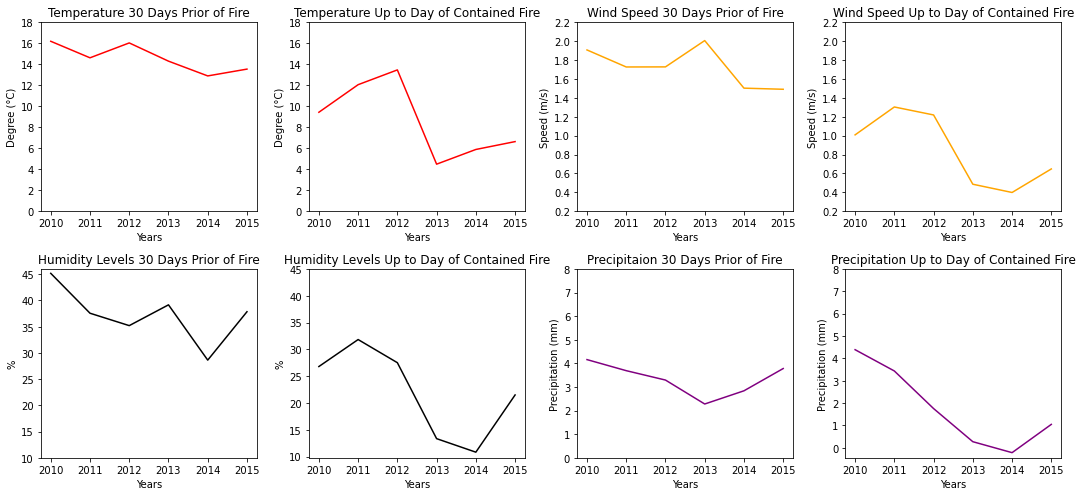

In [24]:
fig = plt.figure(figsize = [15, 7]) #set size of figure to be big enough to see

fig.add_subplot(2, 4, 1) #rows, columns, # of graph
plt.plot(years, temp30, color = 'red') #plot data
plt.title('Temperature 30 Days Prior of Fire') #set title
plt.xlabel('Years') #label x axis
plt.ylabel('Degree (°C)') #label y axis
plt.yticks(np.arange(0, 20, 2)) #set yticks, each variable will be different

fig.add_subplot(2, 4, 2)
plt.plot(years, tempcont, color = 'red') #set color of each graph (variable) to be different
plt.title('Temperature Up to Day of Contained Fire')
plt.xlabel('Years')
plt.ylabel('Degree (°C)')
plt.yticks(np.arange(0, 20, 2))

fig.add_subplot(2, 4, 3)
plt.plot(years, wind30, color = 'orange')
plt.title('Wind Speed 30 Days Prior of Fire') #titles are very important
plt.xlabel('Years') #don't forget to label your axes
plt.ylabel('Speed (m/s)') #units and labels are very important
plt.yticks(np.arange(0.2, 2.4, .2)) #set ytick as same as the next column, 30 day prior & up-to-day

fig.add_subplot(2, 4, 4)
plt.plot(years, windcont, color = 'orange')
plt.title('Wind Speed Up to Day of Contained Fire')
plt.xlabel('Years')
plt.ylabel('Speed (m/s)')  
plt.yticks(np.arange(0.2, 2.4, .2))

fig.add_subplot(2, 4, 5)
plt.plot(years, hum30, color = 'black')
plt.title('Humidity Levels 30 Days Prior of Fire')
plt.xlabel('Years')
plt.ylabel('%')
plt.yticks(np.arange(10, 47, 5)) #setting variables to have the same yticks makes graph easier to read

fig.add_subplot(2, 4, 6)
plt.plot(years, humcont, color = 'black')
plt.title('Humidity Levels Up to Day of Contained Fire')
plt.xlabel('Years')
plt.ylabel('%') 
plt.yticks(np.arange(10, 47, 5))

fig.add_subplot(2, 4, 7)
plt.plot(years, prec30, color = 'purple')
plt.title('Precipitaion 30 Days Prior of Fire')
plt.xlabel('Years')
plt.ylabel('Precipitation (mm)')
plt.yticks(np.arange(0, 9, 1))

fig.add_subplot(2, 4, 8)
plt.plot(years, preccont, color = 'purple')
plt.title('Precipitation Up to Day of Contained Fire')
plt.xlabel('Years')
plt.ylabel('Precipitation (mm)')
plt.yticks(np.arange(0, 9, 1))

fig.tight_layout() #make the graph more condensed, in a nicer format

# Scientific Conclusion/Findings

In the beginning, I wanted to make a prediction model for wildfires in California, but Professor Dave stated it was near impossible. I shifted my project proposal to seeing how frequent fires have been in the last few decades along with their trends using climate variables.

**Figure Explanations & Observations**
- Overall, I found that the middle (vertical) strip, southwestern part, and coastline of California are most prone to wildfires making me think that it is due to the areas that have the most vegetation and sources of water. It makes sense because if dense coverage of vegetation is closer to a water source, such as the ocean or large irrigation systems (Central California), it grows bigger and gains higher levels of humidity and precipitation. However, this means areas of dense vegetation, forests or farmland, are targets due to their flammability and surroundings. Fires are difficult to start in a dry environment(southeastern California, proximity to Nevada & Arizona, desert states) because there isn't much vegetation for it to stick to and spread, hence the barren areas on the geoplots. 


- If we look at the climate variable graphs, the 30 days prior graph shows a relative decline from 2010 to 2015, while the up-to-day graphs shows a sharp decline and change over the years. There is a significant drop meaning the closer the date of the fire, the decline in the temperature, wind speed, humidity levels, and precipitation. Precipitation does not seem too much of a significant trend, and that might be due to California's lack of rain and long history with droughts. I had made plots using the data on 7 days prior to the fire, but there wasn't much of a difference when compared to 30 days prior. It seems as if the few days leading up to the fire are most crucial in determining the location and conditions of a possible wildfire. 


- If we look at the first heatmap, the summer months from May to September are prone to fires due to the increase in temperatures during those months. June, July, & August being peak fire season. As an addition, the second heatmap displays the distribution of fire causes each year. I found it to be quite informative as it shows us the causes that we don't really think about. There is a lot of line activity in the top right and middle of the heatmap, specifically Arson, Debris Burning, Equipment Use, Lightning, Miscellaneous, & Missing/Undefined. As you can notice, most of the causes are from anthropogenic impacts on the environment rather than the natural events. Fires are more frequent from 2009 to 2015, which may have to due with climate change.


- We can consider a contour plot as a form of hazard map which shows the pattern in which fires have happened over the last 20 to 30 years. Patterns are important in understanding where and how often fires occur throughout the state. This is a solid pattern that we can consider when making emergency plans. Heatmaps are a simple way to detect patterns of wildfires on a monthly and yearly basis, keeping an eye on the spring and summer months. Taking this into consideration, emergency measures and plans are made to prevent fires from happening or from harming civilization and surrounding areas. 

**What I Could Not Do & Problems I Ran Into**
1) Up-to-date datasets on wildfires were difficult to find and ended up having to go on Kaggle.com. I found 2 related datasets which unfortunately were only up to 2015. This makes my graphs not as accurate as I would want them to be, but are decent enough to show trends and patterns. 

2) I realized the sqlite3 dataset made running my code very diffiult because it took a very long time to read in the dataset and run my geoplots and that slowed down my progress. I could not make many changes and experiment with different arguments. It required around 20 to 30 minutes to run these 2 cells a single time. 

3) I made 2 heatmaps and was happy with them, but getting them to that state had me looking up different types of graphs on forums and Python websites for 2 days. Learning how to group columns together from an sqlite3 file was challenging because there was hardly any forums or sites that went into detail, but I managed to find something and it worked. There was little information regarding different types of heatmaps and which graph to use. It was either matplotlib or seaborn graphs. Using matplotlib condensed my heatmap all the way to the left and essentially gave me no figure. It wouldn't read my data correctly and I gave up on wanting to figure it out ending with me using seaborn instead.

4) I felt as if I didn't have the necessary coding skills to make any form of elaborate graphs, such as a hazard map. There weren't forums on how to make hazard maps on Python or matplotlib so I could not progress. I consider my geoplots as a form of hazard map and hope it was enough.

5) I wanted to make more fascinating graphs and maps, such as an orthographic projection, but I couldn't do so due to my project being focused on California. I had to stick to flat projections which is a bit boring. Due to this specific focus, it was hard to get anything elaborate. 

**For the Future**
- I might consider animating my geoplots and heatmaps over a time period to see how much the frequencies and distributions have changed over the years as climate change worsens or even reverses. Having interactive maps and figures makes learning much easier.


- Perhaps using an updated dataset that provides up to 2020 would give me more accurate results and patterns that I can follow and make solid predictions with. Maybe even add in the stupid gender reveal parties that lead to massive, unnecessary fires.


- I want to make more elaborate graphs and figures once I have the right coding skills. Currently I'm still a beginner and that hinders my ability to do anything beyond what I have learned in class.


- I am content with what I have done. I showed my abilities and did what I thought was appropriate for this project. Overall, I am happy with my project and the skills I have learned over the quarter. Although very fast paced, I learned Python quickly and am able to add this project and technical skill to my resume. 

**I included the saved images of the figures and plots I made in case you guys decide to show them to the next class**